# Hackathon : Reinforcement Learning for Drone Navigation

- Team name: Olympus Coders
- Team members names: Loan SAMAI, Farès BENAGGOUNE, Marc Estassy BATABA

## 0. Prerequisites

In [33]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import agent
import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Training

In [ ]:
# On peut passer un seul fichier de configuration ou une liste de plusieurs configs
# Exemple avec une seule config : trained_agent, all_rewards = simulate.multi_config_train(["train_configs/config_1.json"])
# Exemple avec plusieurs configs : trained_agent, all_rewards = simulate.multi_config_train(["train_configs/config_1.json", "train_configs/config_3.json", "train_configs/config_7.json"])

trained_agent, all_rewards = simulate.multi_config_train([
    "train_configs/config_small.json",
    "train_configs/config_medium.json",  # Commence par les environnements simples
    "train_configs/config_hybride.json", # Progresse vers les hybrides
    "train_configs/config_hard.json",    # Puis les difficiles
    "config.json",                       # Inclut aussi la config par défaut pour compléter l'apprentissage
], max_total_episodes=3000, checkpoint_path="multi_config_checkpoint.pth", save_interval=100)


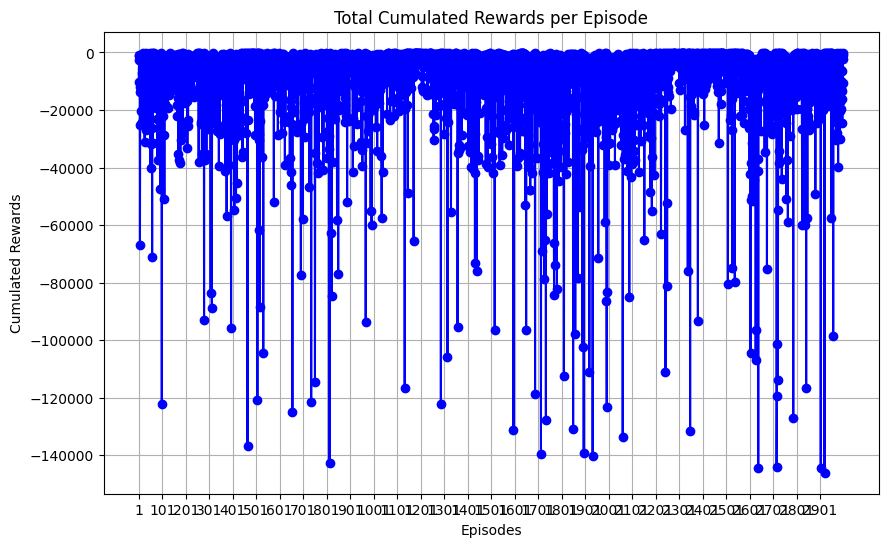

In [39]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [40]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [41]:
trained_agent = agent.MyAgent(...)
trained_agent.load_checkpoint("multi_config_checkpoint_best.pth")  # le meilleur
all_results = simulate.evaluate(eval_config_paths, trained_agent, use_best_checkpoint=False)


--- Evaluating Configuration: ./eval_configs/config_1.json ---
Episode 1/10, Step 60, Reward: -5591.23, Evacuated: 0, Deactivated: 4
Episode 2/10, Step 64, Reward: -8698.18, Evacuated: 0, Deactivated: 4
Episode 3/10, Step 114, Reward: -1998.93, Evacuated: 3, Deactivated: 1
Episode 4/10, Step 119, Reward: -27976.62, Evacuated: 0, Deactivated: 4
Episode 5/10, Step 101, Reward: -21631.35, Evacuated: 0, Deactivated: 4
Episode 6/10, Step 63, Reward: -8761.40, Evacuated: 0, Deactivated: 4
Episode 7/10, Step 127, Reward: -26854.32, Evacuated: 0, Deactivated: 4
Episode 8/10, Step 156, Reward: -39763.43, Evacuated: 0, Deactivated: 4
Episode 9/10, Step 80, Reward: -21418.88, Evacuated: 0, Deactivated: 4
Episode 10/10, Step 96, Reward: -19302.66, Evacuated: 0, Deactivated: 4

--- Evaluating Configuration: ./eval_configs/config_2.json ---
Episode 1/10, Step 66, Reward: -10395.64, Evacuated: 0, Deactivated: 4
Episode 2/10, Step 212, Reward: -61071.85, Evacuated: 0, Deactivated: 4
Episode 3/10, Ste

In [42]:
display(all_results)

,config_path,episode,steps,reward,evacuated,deactivated
0,./eval_configs/config_1.json,1,60,-5591.226297,0,4
1,./eval_configs/config_1.json,2,64,-8698.183544,0,4
2,./eval_configs/config_1.json,3,114,-1998.926466,3,1
3,./eval_configs/config_1.json,4,119,-27976.615491,0,4
4,./eval_configs/config_1.json,5,101,-21631.351868,0,4
...,...,...,...,...,...,...
95,./eval_configs/config_10.json,6,156,-30459.554651,0,4
96,./eval_configs/config_10.json,7,596,-69277.041039,0,4
97,./eval_configs/config_10.json,8,91,-20728.249203,0,4
98,./eval_configs/config_10.json,9,88,-16913.286614,0,4


In [43]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)

,config_path,avg_steps,avg_reward,avg_evacuated,avg_deactivated
0,./eval_configs/config_1.json,98.0,-18199.699169,0.3,3.7
1,./eval_configs/config_10.json,339.0,-69509.665273,0.0,3.8
2,./eval_configs/config_2.json,92.5,-19489.078728,0.0,4.0
3,./eval_configs/config_3.json,97.4,-18443.410582,0.0,4.0
4,./eval_configs/config_4.json,80.7,-18836.906595,0.0,4.0
5,./eval_configs/config_5.json,88.5,-16309.964880,0.0,4.0
6,./eval_configs/config_6.json,281.9,-57213.435753,0.0,4.0
7,./eval_configs/config_7.json,40.9,-8929.829419,0.0,4.0
8,./eval_configs/config_8.json,596.1,-131711.590593,0.0,3.6
9,./eval_configs/config_9.json,179.3,-42989.580206,0.0,4.0
